### **Objective**
The goal of this project using SQL would be to identify oppurtunities to increase the occupancy rate on low-performing flights,which can ultimately lead to increased profitability for the airline.

### **Importing Libraries**

In [1]:
import sqlite3 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

### **Create Database Connection**

In [2]:
database='travel.sqlite'
connection=sqlite3.connect(database)
cursor=connection.cursor()

### **List of Tables**

In [3]:
query="select *from sqlite_master where type='table'; "

In [4]:
tables=pd.read_sql(query,connection)
tables

,type,name,tbl_name,rootpage,sql
0,table,aircrafts_data,aircrafts_data,2,CREATE TABLE aircrafts_data (\r\n aircraft_...
1,table,airports_data,airports_data,3,CREATE TABLE airports_data (\r\n airport_co...
2,table,boarding_passes,boarding_passes,4,CREATE TABLE boarding_passes (\r\n ticket_n...
3,table,bookings,bookings,5,CREATE TABLE bookings (\r\n book_ref charac...
4,table,flights,flights,6,CREATE TABLE flights (\r\n flight_id intege...
5,table,seats,seats,7,CREATE TABLE seats (\r\n aircraft_code char...
6,table,ticket_flights,ticket_flights,8,CREATE TABLE ticket_flights (\r\n ticket_no...
7,table,tickets,tickets,9,CREATE TABLE tickets (\r\n ticket_no charac...


**Another approach**

In [5]:
cursor=connection.cursor()
cursor.execute("select *from sqlite_master where type='table';")
print("List of tables present in the database")
table_list=[table[1] for table in cursor.fetchall()]
table_list

List of tables present in the database


['aircrafts_data',
 'airports_data',
 'boarding_passes',
 'bookings',
 'flights',
 'seats',
 'ticket_flights',
 'tickets']

### **Data Exploration**

##### Display all the data from each table in the database one by one to understand the information they contain.

**Show aircrafts_data table data**

In [6]:
aircrafts_data=pd.read_sql_query("select *from aircrafts_data",connection)
aircrafts_data.head()

,aircraft_code,model,range
0,773,"{""en"": ""Boeing 777-300"", ""ru"": ""Боинг 777-300""}",11100
1,763,"{""en"": ""Boeing 767-300"", ""ru"": ""Боинг 767-300""}",7900
2,SU9,"{""en"": ""Sukhoi Superjet-100"", ""ru"": ""Сухой Суп...",3000
3,320,"{""en"": ""Airbus A320-200"", ""ru"": ""Аэробус A320-...",5700
4,321,"{""en"": ""Airbus A321-200"", ""ru"": ""Аэробус A321-...",5600


In [7]:
aircrafts_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   aircraft_code  9 non-null      object
 1   model          9 non-null      object
 2   range          9 non-null      int64 
dtypes: int64(1), object(2)
memory usage: 348.0+ bytes


**Show airports_data table data**

In [8]:
airports_data=pd.read_sql_query("select *from airports_data",connection)
airports_data.head(4)

,airport_code,airport_name,city,coordinates,timezone
0,YKS,"{""en"": ""Yakutsk Airport"", ""ru"": ""Якутск""}","{""en"": ""Yakutsk"", ""ru"": ""Якутск""}","(129.77099609375,62.0932998657226562)",Asia/Yakutsk
1,MJZ,"{""en"": ""Mirny Airport"", ""ru"": ""Мирный""}","{""en"": ""Mirnyj"", ""ru"": ""Мирный""}","(114.03900146484375,62.534698486328125)",Asia/Yakutsk
2,KHV,"{""en"": ""Khabarovsk-Novy Airport"", ""ru"": ""Хабар...","{""en"": ""Khabarovsk"", ""ru"": ""Хабаровск""}","(135.18800354004,48.5279998779300001)",Asia/Vladivostok
3,PKC,"{""en"": ""Yelizovo Airport"", ""ru"": ""Елизово""}","{""en"": ""Petropavlovsk"", ""ru"": ""Петропавловск-К...","(158.453994750976562,53.1679000854492188)",Asia/Kamchatka


In [9]:
airports_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   airport_code  104 non-null    object
 1   airport_name  104 non-null    object
 2   city          104 non-null    object
 3   coordinates   104 non-null    object
 4   timezone      104 non-null    object
dtypes: object(5)
memory usage: 4.2+ KB


**Show boarding_passes table data**

In [10]:
boarding_passes=pd.read_sql_query("select *from boarding_passes",connection)
boarding_passes.head()

,ticket_no,flight_id,boarding_no,seat_no
0,0005435212351,30625,1,2D
1,0005435212386,30625,2,3G
2,0005435212381,30625,3,4H
3,0005432211370,30625,4,5D
4,0005435212357,30625,5,11A


In [11]:
boarding_passes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 579686 entries, 0 to 579685
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   ticket_no    579686 non-null  object
 1   flight_id    579686 non-null  int64 
 2   boarding_no  579686 non-null  int64 
 3   seat_no      579686 non-null  object
dtypes: int64(2), object(2)
memory usage: 17.7+ MB


**Show bookings table data**

In [12]:
bookings=pd.read_sql_query("select *from bookings",connection)
bookings.head()

,book_ref,book_date,total_amount
0,00000F,2017-07-05 03:12:00+03,265700
1,000012,2017-07-14 09:02:00+03,37900
2,000068,2017-08-15 14:27:00+03,18100
3,000181,2017-08-10 13:28:00+03,131800
4,0002D8,2017-08-07 21:40:00+03,23600


In [13]:
bookings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 262788 entries, 0 to 262787
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   book_ref      262788 non-null  object
 1   book_date     262788 non-null  object
 2   total_amount  262788 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 6.0+ MB


**Show flights table data**

In [14]:
flights=pd.read_sql_query("select *from flights",connection)
flights.head()

,flight_id,flight_no,scheduled_departure,scheduled_arrival,departure_airport,arrival_airport,status,aircraft_code,actual_departure,actual_arrival
0,1185,PG0134,2017-09-10 09:50:00+03,2017-09-10 14:55:00+03,DME,BTK,Scheduled,319,\N,\N
1,3979,PG0052,2017-08-25 14:50:00+03,2017-08-25 17:35:00+03,VKO,HMA,Scheduled,CR2,\N,\N
2,4739,PG0561,2017-09-05 12:30:00+03,2017-09-05 14:15:00+03,VKO,AER,Scheduled,763,\N,\N
3,5502,PG0529,2017-09-12 09:50:00+03,2017-09-12 11:20:00+03,SVO,UFA,Scheduled,763,\N,\N
4,6938,PG0461,2017-09-04 12:25:00+03,2017-09-04 13:20:00+03,SVO,ULV,Scheduled,SU9,\N,\N


In [15]:
flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33121 entries, 0 to 33120
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   flight_id            33121 non-null  int64 
 1   flight_no            33121 non-null  object
 2   scheduled_departure  33121 non-null  object
 3   scheduled_arrival    33121 non-null  object
 4   departure_airport    33121 non-null  object
 5   arrival_airport      33121 non-null  object
 6   status               33121 non-null  object
 7   aircraft_code        33121 non-null  object
 8   actual_departure     33121 non-null  object
 9   actual_arrival       33121 non-null  object
dtypes: int64(1), object(9)
memory usage: 2.5+ MB


**Show seats table data**

In [16]:
seats=pd.read_sql_query("select *from seats",connection)
seats.head()

,aircraft_code,seat_no,fare_conditions
0,319,2A,Business
1,319,2C,Business
2,319,2D,Business
3,319,2F,Business
4,319,3A,Business


In [17]:
seats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1339 entries, 0 to 1338
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   aircraft_code    1339 non-null   object
 1   seat_no          1339 non-null   object
 2   fare_conditions  1339 non-null   object
dtypes: object(3)
memory usage: 31.5+ KB


**Show ticket_flights table data**

In [18]:
ticket_flights=pd.read_sql_query("select *from ticket_flights",connection)
ticket_flights.head()

,ticket_no,flight_id,fare_conditions,amount
0,0005432159776,30625,Business,42100
1,0005435212351,30625,Business,42100
2,0005435212386,30625,Business,42100
3,0005435212381,30625,Business,42100
4,0005432211370,30625,Business,42100


In [19]:
ticket_flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1045726 entries, 0 to 1045725
Data columns (total 4 columns):
 #   Column           Non-Null Count    Dtype 
---  ------           --------------    ----- 
 0   ticket_no        1045726 non-null  object
 1   flight_id        1045726 non-null  int64 
 2   fare_conditions  1045726 non-null  object
 3   amount           1045726 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 31.9+ MB


**Show tickets table data**

In [20]:
tickets=pd.read_sql_query("select *from tickets",connection)
tickets.head()

,ticket_no,book_ref,passenger_id
0,0005432000987,06B046,8149 604011
1,0005432000988,06B046,8499 420203
2,0005432000989,E170C3,1011 752484
3,0005432000990,E170C3,4849 400049
4,0005432000991,F313DD,6615 976589


In [21]:
tickets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366733 entries, 0 to 366732
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   ticket_no     366733 non-null  object
 1   book_ref      366733 non-null  object
 2   passenger_id  366733 non-null  object
dtypes: object(3)
memory usage: 8.4+ MB


#### Display the info of all table columns.

In [22]:
cursor=connection.cursor()
cursor.execute("select *from sqlite_master where type='table';")
table_list=[table[1] for table in cursor.fetchall()]
table_list

['aircrafts_data',
 'airports_data',
 'boarding_passes',
 'bookings',
 'flights',
 'seats',
 'ticket_flights',
 'tickets']

**The PRAGMA table_info query returns the following information for each column:**
>- column[0]: Column ID (index)
>- column[1]: Column name
>- column[2]: Data type
>- column[3]: Not NULL flag
>- column[4]: Default value
>- column[5]: Primary key flag

In [23]:
for table in table_list:
    print("\n Table",table)
    column_info=connection.execute("PRAGMA table_info({})".format(table))
    for column in column_info.fetchall():
        print(column[1:10])


 Table aircrafts_data
('aircraft_code', 'character(3)', 1, None, 0)
('model', 'jsonb', 1, None, 0)
('range', 'INTEGER', 1, None, 0)

 Table airports_data
('airport_code', 'character(3)', 1, None, 0)
('airport_name', 'jsonb', 1, None, 0)
('city', 'jsonb', 1, None, 0)
('coordinates', 'point', 1, None, 0)
('timezone', 'TEXT', 1, None, 0)

 Table boarding_passes
('ticket_no', 'character(13)', 1, None, 0)
('flight_id', 'INTEGER', 1, None, 0)
('boarding_no', 'INTEGER', 1, None, 0)
('seat_no', 'character varying(4)', 1, None, 0)

 Table bookings
('book_ref', 'character(6)', 1, None, 0)
('book_date', 'timestamp with time zone', 1, None, 0)
('total_amount', 'numeric(10,2)', 1, None, 0)

 Table flights
('flight_id', 'INTEGER', 1, None, 0)
('flight_no', 'character(6)', 1, None, 0)
('scheduled_departure', 'timestamp with time zone', 1, None, 0)
('scheduled_arrival', 'timestamp with time zone', 1, None, 0)
('departure_airport', 'character(3)', 1, None, 0)
('arrival_airport', 'character(3)', 1, Non

### Check Missing Value for every table 

In [24]:
for table in table_list:
    print('\n Table:',table)
    df_table=pd.read_sql_query(f"select *from {table}",connection)
    #print(df_table)
    print(df_table.isnull().sum())
    


 Table: aircrafts_data
aircraft_code    0
model            0
range            0
dtype: int64

 Table: airports_data
airport_code    0
airport_name    0
city            0
coordinates     0
timezone        0
dtype: int64

 Table: boarding_passes
ticket_no      0
flight_id      0
boarding_no    0
seat_no        0
dtype: int64

 Table: bookings
book_ref        0
book_date       0
total_amount    0
dtype: int64

 Table: flights
flight_id              0
flight_no              0
scheduled_departure    0
scheduled_arrival      0
departure_airport      0
arrival_airport        0
status                 0
aircraft_code          0
actual_departure       0
actual_arrival         0
dtype: int64

 Table: seats
aircraft_code      0
seat_no            0
fare_conditions    0
dtype: int64

 Table: ticket_flights
ticket_no          0
flight_id          0
fare_conditions    0
amount             0
dtype: int64

 Table: tickets
ticket_no       0
book_ref        0
passenger_id    0
dtype: int64


### **Basic Analysis**

**How many planes have more than 100 seats?**

In [25]:
number_seats=pd.read_sql_query(''' select aircraft_code,count(*) as number_seats from
 seats group by aircraft_code having number_seats>100''',connection)
number_seats

,aircraft_code,number_seats
0,319,116
1,320,140
2,321,170
3,733,130
4,763,222
5,773,402


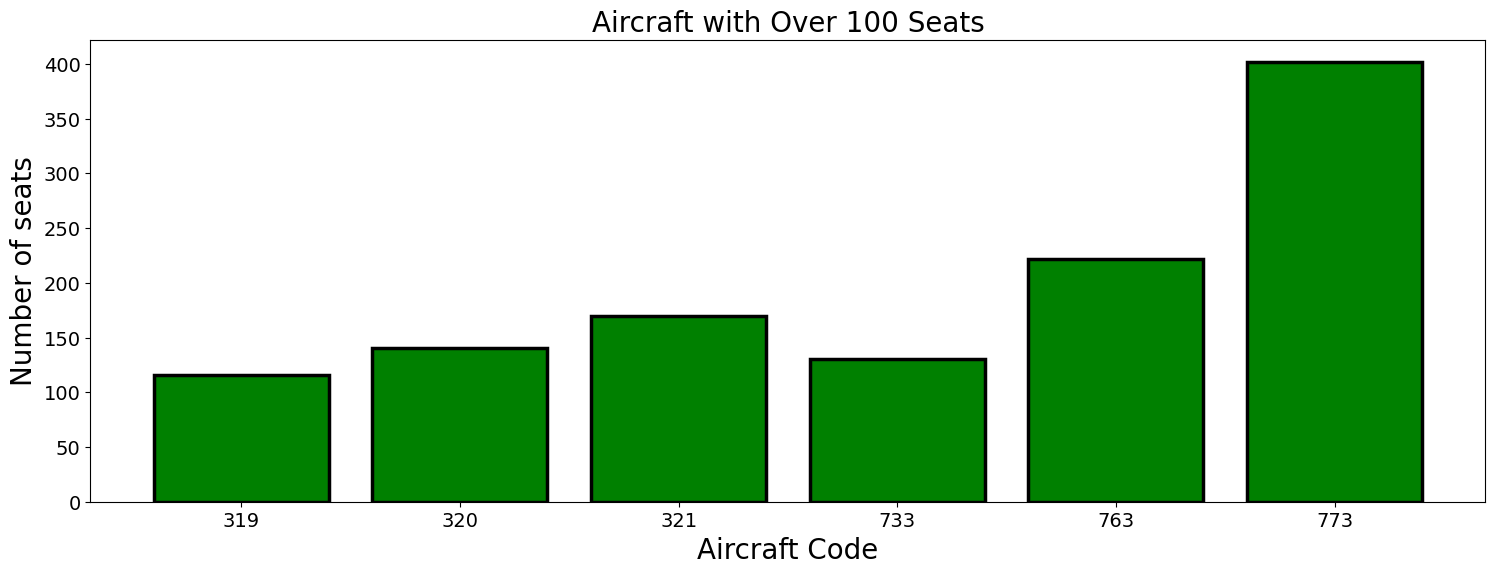

In [26]:
number_seats=pd.read_sql_query(''' select aircraft_code,count(*) as number_seats from
 seats group by aircraft_code having number_seats>100''',connection)
number_seats
plt.figure(figsize=(18,6))
plt.bar(number_seats['aircraft_code'],number_seats['number_seats'],color='g',edgecolor='black',linewidth=2.5)
plt.title("Aircraft with Over 100 Seats",fontsize=20)
plt.xlabel("Aircraft Code",fontsize=20)
plt.ylabel("Number of seats",fontsize=20)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

**How the number of tickets booking and total amount earned changed with the time.**

In [27]:
for table in table_list:
    print(table)
    print()
    df_data=pd.read_sql_query(f"select *from {table}",connection)
    print(df_data)

aircrafts_data

  aircraft_code                                              model  range
0           773    {"en": "Boeing 777-300", "ru": "Боинг 777-300"}  11100
1           763    {"en": "Boeing 767-300", "ru": "Боинг 767-300"}   7900
2           SU9  {"en": "Sukhoi Superjet-100", "ru": "Сухой Суп...   3000
3           320  {"en": "Airbus A320-200", "ru": "Аэробус A320-...   5700
4           321  {"en": "Airbus A321-200", "ru": "Аэробус A321-...   5600
5           319  {"en": "Airbus A319-100", "ru": "Аэробус A319-...   6700
6           733    {"en": "Boeing 737-300", "ru": "Боинг 737-300"}   4200
7           CN1  {"en": "Cessna 208 Caravan", "ru": "Сессна 208...   1200
8           CR2  {"en": "Bombardier CRJ-200", "ru": "Бомбардье ...   2700
airports_data

    airport_code                                       airport_name  \
0            YKS          {"en": "Yakutsk Airport", "ru": "Якутск"}   
1            MJZ            {"en": "Mirny Airport", "ru": "Мирный"}   
2            KHV

In [28]:
tickets=pd.read_sql_query('''select *
                    from tickets as t inner join bookings as b 
                    on t.book_ref=b.book_ref ''',connection)
tickets.dtypes  # book_date is object form so change the date time

ticket_no       object
book_ref        object
passenger_id    object
book_ref        object
book_date       object
total_amount     int64
dtype: object

In [29]:
tickets['book_date']=pd.to_datetime(tickets['book_date'])
tickets.dtypes # sucessfully change the date time 

ticket_no                          object
book_ref                           object
passenger_id                       object
book_ref                           object
book_date       datetime64[ns, UTC+03:00]
total_amount                        int64
dtype: object

In [30]:
tickets['date']=tickets['book_date'].dt.date
tickets.head()  # extract only date from book_date 

,ticket_no,book_ref,passenger_id,book_ref,book_date,total_amount,date
0,0005432000987,06B046,8149 604011,06B046,2017-07-05 20:19:00+03:00,12400,2017-07-05
1,0005432000988,06B046,8499 420203,06B046,2017-07-05 20:19:00+03:00,12400,2017-07-05
2,0005432000989,E170C3,1011 752484,E170C3,2017-06-29 01:55:00+03:00,24700,2017-06-29
3,0005432000990,E170C3,4849 400049,E170C3,2017-06-29 01:55:00+03:00,24700,2017-06-29
4,0005432000991,F313DD,6615 976589,F313DD,2017-07-03 04:37:00+03:00,30900,2017-07-03


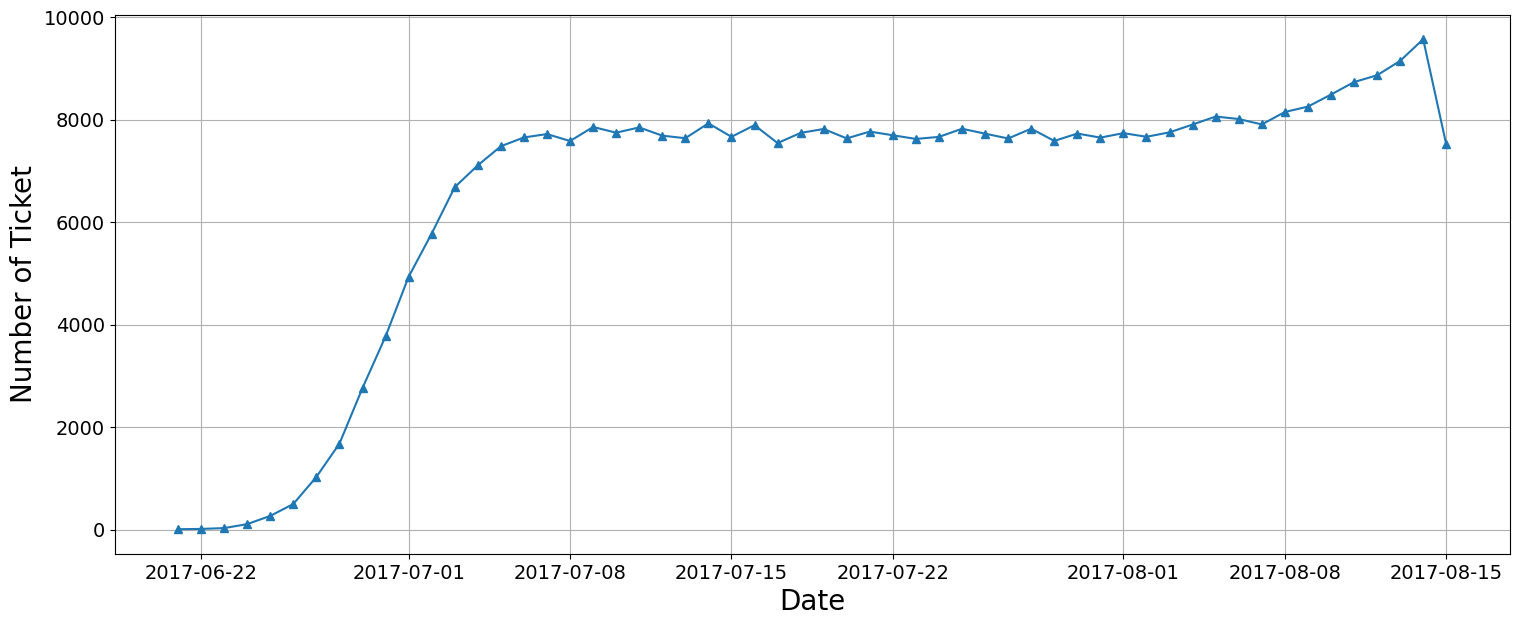

In [31]:
x=tickets.groupby('date')[['date']].count()
plt.figure(figsize=(18,7))
plt.plot(x.index,x['date'],marker='^')
plt.xlabel('Date',fontsize=20)
plt.ylabel("Number of Ticket",fontsize=20)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid('b')
plt.show()

In [32]:
booking=pd.read_sql_query("select *from bookings",connection)
booking.head(2)

,book_ref,book_date,total_amount
0,00000F,2017-07-05 03:12:00+03,265700
1,000012,2017-07-14 09:02:00+03,37900


In [33]:
booking.dtypes

book_ref        object
book_date       object
total_amount     int64
dtype: object

In [34]:
booking['book_date']=pd.to_datetime(booking['book_date'])
booking.dtypes

book_ref                           object
book_date       datetime64[ns, UTC+03:00]
total_amount                        int64
dtype: object

In [35]:
booking['date']=booking['book_date'].dt.date
booking.head(2)

,book_ref,book_date,total_amount,date
0,00000F,2017-07-05 03:12:00+03:00,265700,2017-07-05
1,000012,2017-07-14 09:02:00+03:00,37900,2017-07-14


In [36]:
x=booking.groupby('date')[['total_amount']].sum()
x.head(2)

,total_amount
date,
2017-06-21,441900
2017-06-22,775300


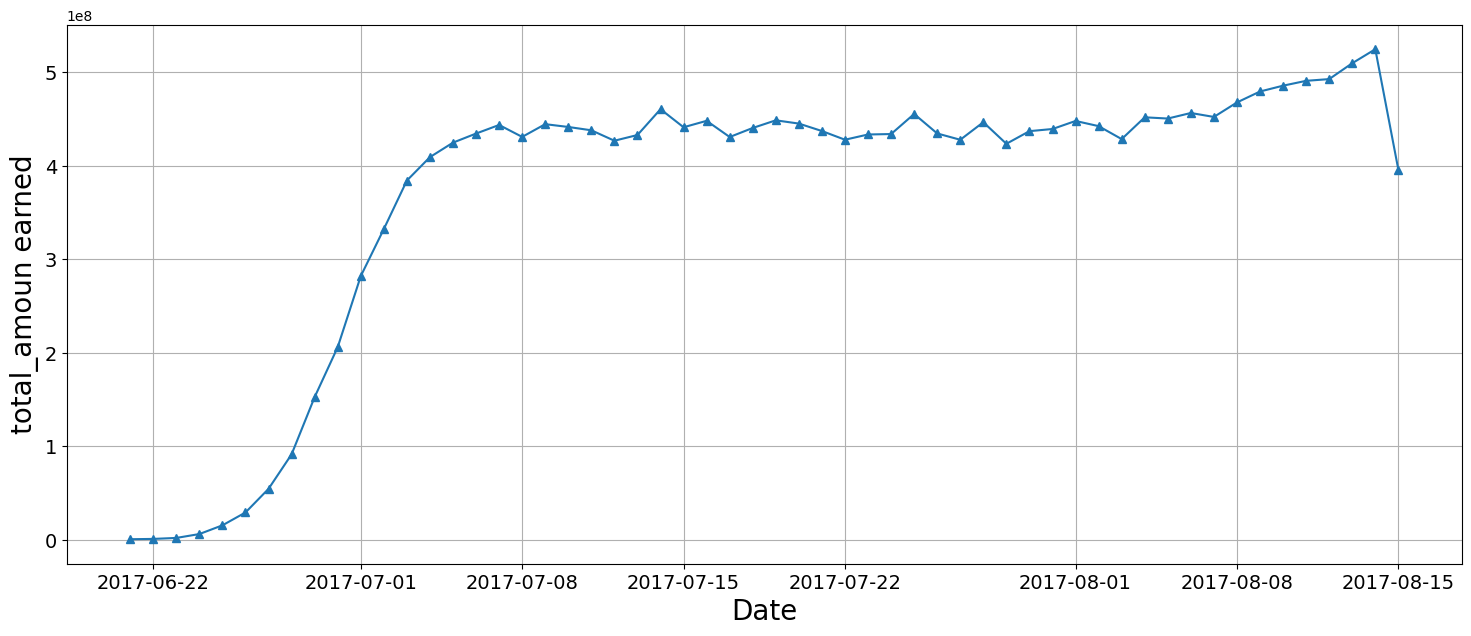

In [37]:
x=booking.groupby('date')[['total_amount']].sum()
plt.figure(figsize=(18,7))
plt.plot(x.index,x['total_amount'],marker='^')
plt.xlabel('Date',fontsize=20)
plt.ylabel("total_amoun earned",fontsize=20)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid('b')
plt.show()

**Calculate the average charges for each aircraft with different fare conditions.**

In [38]:
df=pd.read_sql_query('''select fare_conditions,aircraft_code,avg(amount) from ticket_flights  join flights  on
                       ticket_flights.flight_id=flights.flight_id group by aircraft_code,fare_conditions''',connection)
df.head(3)

,fare_conditions,aircraft_code,avg(amount)
0,Business,319,113550.557703
1,Economy,319,38311.402347
2,Business,321,34435.662664


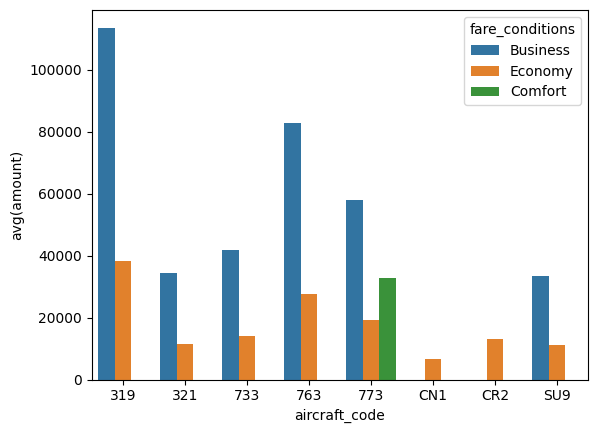

In [39]:
sns.barplot(data=df,x='aircraft_code',y='avg(amount)',hue='fare_conditions')
plt.show()

### **Analyzing occupancy rate**

**For each aircraft calculate the total revenue per year and the average revenue per ticket.**

In [40]:
df=pd.read_sql_query('''select aircraft_code, count(*) as ticket_count, sum(amount) as total_revenue, sum(amount)/count(*) as Avg_revenue_per_ticket from
                        ticket_flights  join flights  on ticket_flights.flight_id=flights.flight_id group by aircraft_code''',connection)

df

,aircraft_code,ticket_count,total_revenue,Avg_revenue_per_ticket
0,319,52853,2706163100,51201
1,321,107129,1638164100,15291
2,733,86102,1426552100,16568
3,763,124774,4371277100,35033
4,773,144376,3431205500,23765
5,CN1,14672,96373800,6568
6,CR2,150122,1982760500,13207
7,SU9,365698,5114484700,13985


**Calculate the average occupancy per aircraft.**

In [41]:
occupancy_rate=pd.read_sql_query('''select a.aircraft_code,avg(a.seats_count) as booked_seats, b.num_seats,avg(a.seats_count)/b.num_seats as occupancy_rate 
                     from 
                       (
                       select aircraft_code,flights.flight_id,count(*) as seats_count from boarding_passes
                     inner join flights
                       on boarding_passes.flight_id=flights.flight_id 
                       group by aircraft_code,flights.flight_id) as a                   
                     inner join
                       (select aircraft_code, count(*) as num_seats from seats group by aircraft_code) as b 
                       on a.aircraft_code=b.aircraft_code group by a.aircraft_code''',connection)
                     
occupancy_rate


,aircraft_code,booked_seats,num_seats,occupancy_rate
0,319,53.583181,116,0.461924
1,321,88.809231,170,0.522407
2,733,80.255462,130,0.617350
3,763,113.937294,222,0.513231
4,773,264.925806,402,0.659019
5,CN1,6.004431,12,0.500369
6,CR2,21.482847,50,0.429657
7,SU9,56.812113,97,0.585692


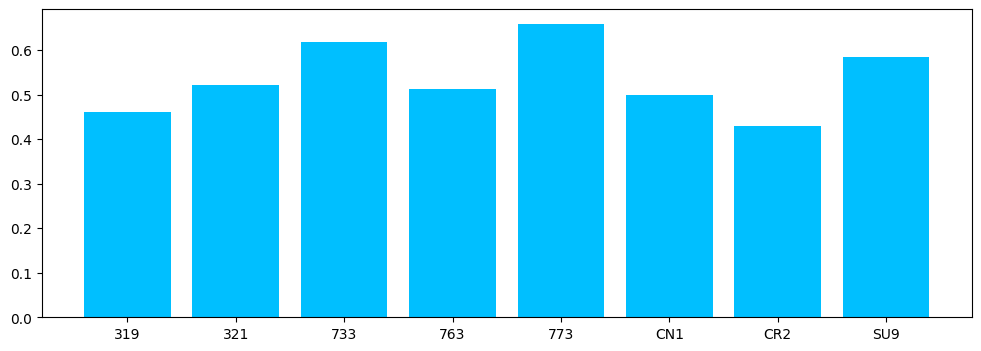

In [55]:
aircraft_code=occupancy_rate["aircraft_code"]
Occupancy_rate=occupancy_rate["occupancy_rate"]
plt.figure(figsize=(12,4))
plt.bar(aircraft_code,Occupancy_rate,color='deepskyblue')
plt.show()

**Calculate by how much the total annual turnover could increase by giving all aircraft a 10% higher occupancy rate.**

In [42]:
occupancy_rate['inc occupancy rate']=occupancy_rate['occupancy_rate']+occupancy_rate['occupancy_rate']*0.1
occupancy_rate

,aircraft_code,booked_seats,num_seats,occupancy_rate,inc occupancy rate
0,319,53.583181,116,0.461924,0.508116
1,321,88.809231,170,0.522407,0.574648
2,733,80.255462,130,0.617350,0.679085
3,763,113.937294,222,0.513231,0.564554
4,773,264.925806,402,0.659019,0.724921
5,CN1,6.004431,12,0.500369,0.550406
6,CR2,21.482847,50,0.429657,0.472623
7,SU9,56.812113,97,0.585692,0.644261


In [43]:
pd.set_option('display.float_format',str)

In [44]:
total_revenue=pd.read_sql_query('''select aircraft_code,sum(amount) as total_revenue from ticket_flights
                                join flights on ticket_flights.flight_id=flights.flight_id group by aircraft_code''',connection)
occupancy_rate['inc Total Annual Turnover']=(total_revenue['total_revenue']/occupancy_rate['occupancy_rate'])*occupancy_rate['inc occupancy rate']
occupancy_rate

,aircraft_code,booked_seats,num_seats,occupancy_rate,inc occupancy rate,inc Total Annual Turnover
0,319,53.58318098720292,116,0.46192397402761143,0.5081163714303726,2976779410.0
1,321,88.80923076923077,170,0.5224072398190045,0.574647963800905,1801980510.0
2,733,80.25546218487395,130,0.617349709114415,0.6790846800258565,1569207310.0000002
3,763,113.93729372937294,222,0.5132310528350132,0.5645541581185146,4808404810.0
4,773,264.9258064516129,402,0.659019419033863,0.7249213609372492,3774326050.0
5,CN1,6.004431314623338,12,0.5003692762186115,0.5504062038404727,106011180.00000001
6,CR2,21.48284690220174,50,0.42965693804403476,0.4726226318484382,2181036550.0
7,SU9,56.81211267605634,97,0.5856918832583128,0.644261071584144,5625933169.999999
